In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/BT4222 Data/crimes.csv"
path = '/content/drive/My Drive/BT4222 Data/crimes.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/BT4222 Data/crimes.csv'


In [ ]:
import pandas as pd
df = pd.read_csv(path)

In [ ]:
df.head()

,Year,NPC,Offence,Number (Case)
0,2011,Central Police Division - Total,Robbery,50
1,2011,Central Police Division - Total,Housebreaking,48
2,2011,Central Police Division - Total,Snatch Theft,47
3,2011,Central Police Division - Total,Theft Of Motor Vehicle,48
4,2011,Central Police Division - Total,Outrage Of Modesty,180


In [ ]:
df['Number (Case)'].dtype

dtype('O')

In [ ]:
# Crime rates from 2012 to 2018
new_df = df[(df.Year.isin(['2012', '2013', '2014', '2015', '2016', '2017', '2018']))]
new_df.head()

,Year,NPC,Offence,Number (Case)
240,2012,Central Police Division - Total,Robbery,34
241,2012,Central Police Division - Total,Housebreaking,32
242,2012,Central Police Division - Total,Snatch Theft,31
243,2012,Central Police Division - Total,Theft Of Motor Vehicle,47
244,2012,Central Police Division - Total,Outrage Of Modesty,193


In [ ]:
# Create new column: neighbourhood
def create_neighbourhood(npc):
  npc_split = npc.split('-')
  neighbourhood = npc_split[-1]
  if 'Total' in neighbourhood:
    return '[Total]' + npc
  else:
    neighbourhood = neighbourhood.replace('NPC', '')
    return neighbourhood

new_df['Neighbourhood'] = new_df.NPC.apply(lambda x: create_neighbourhood(x))
new_df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Year,NPC,Offence,Number (Case),Neighbourhood
1915,2018,Woodlands Police Division - Sembawang NPC,Robbery,0,Sembawang
1916,2018,Woodlands Police Division - Sembawang NPC,Housebreaking,0,Sembawang
1917,2018,Woodlands Police Division - Sembawang NPC,Snatch Theft,0,Sembawang
1918,2018,Woodlands Police Division - Sembawang NPC,Theft Of Motor Vehicle,1,Sembawang
1919,2018,Woodlands Police Division - Sembawang NPC,Outrage Of Modesty,1,Sembawang


In [ ]:
new_df.head()

,Year,NPC,Offence,Number (Case),Neighbourhood
240,2012,Central Police Division - Total,Robbery,34,[Total]Central Police Division - Total
241,2012,Central Police Division - Total,Housebreaking,32,[Total]Central Police Division - Total
242,2012,Central Police Division - Total,Snatch Theft,31,[Total]Central Police Division - Total
243,2012,Central Police Division - Total,Theft Of Motor Vehicle,47,[Total]Central Police Division - Total
244,2012,Central Police Division - Total,Outrage Of Modesty,193,[Total]Central Police Division - Total


In [ ]:
# Map postal codes to NPC
def postal(x):
  if 'Total' in x:
    return '-'
  elif 'Ang Mo Kio North' in x:
    return '569784'
  elif 'Ang Mo Kio South' in x:
    return '569929'
  elif 'Bedok North' in x:
    return '469676'
  elif 'Bedok South' in x:
    return '469045'
  elif 'Bishan' in x:
    return '579757'
  elif 'Bukit Batok' in x:
    return '659840'
  elif 'Bukit Merah East' in x:
    return '088762'
  elif 'Bukit Merah West' in x:
    return '159682'
  elif 'Bukit Panjang' in x:
    return '679005'
  elif 'Bukit Timah' in x:
    return '268914'
  elif 'Changi' in x:
    return '529914'
  elif 'Choa Chu Kang' in x:
    return '689286'
  elif 'Clementi' in x:
    return '149725'
  elif 'Geylang' in x:
    return '401094'
  elif 'Hougang' in x:
    return '538775'
  elif 'Jurong East' in x:
    return '609962'
  elif 'Jurong West' in x:
    return '649818'
  elif 'Kampong Java' in x:
    return '228892'
  elif 'Marine Parade' in x:
    return '449296'
  elif 'Nanyang' in x:
    return '649482'
  elif 'Orchard' in x:
    return '239572'
  elif 'Pasir Ris' in x:
    return '519457'
  elif 'Queenstown' in x:
    return '149725'
  elif 'Rochor' in x:
    return '208678'
  elif 'Sembawang' in x:
    return '757633'
  elif 'Serangoon' in x:
    return '556129'
  elif 'Tampines' in x:
    return '529682'
  elif 'Toa Payoh' in x:
    return '319194'
  elif 'Woodlands' in x:
    return '738070'
  elif 'Yishun North' in x:
    return '768827'
  elif 'Yishun South' in x:
    return '768456'
  elif 'Punggol' in x:
    return '828837'
  elif 'Marina Bay' in x:
    return '078870'
  elif 'Sengkang' in x:
    return '545025'
  else:
    return '-'

new_df['Postal'] = new_df['Neighbourhood'].apply(lambda x: postal(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
new_df.tail()

,Year,NPC,Offence,Number (Case),Neighbourhood,Postal
1915,2018,Woodlands Police Division - Sembawang NPC,Robbery,0,Sembawang,757633
1916,2018,Woodlands Police Division - Sembawang NPC,Housebreaking,0,Sembawang,757633
1917,2018,Woodlands Police Division - Sembawang NPC,Snatch Theft,0,Sembawang,757633
1918,2018,Woodlands Police Division - Sembawang NPC,Theft Of Motor Vehicle,1,Sembawang,757633
1919,2018,Woodlands Police Division - Sembawang NPC,Outrage Of Modesty,1,Sembawang,757633


In [ ]:
# new_df.to_csv('/content/drive/My Drive/BT4222 Data/crimes_locations.csv', index = False, header=True)

## These are the neighbourhoods available in the Crime Dataset provided by Data.gov.sg

In [ ]:
# Number of neighbourhoods
new_df.Neighbourhood.unique()

array(['-', ' Bukit Merah East ', ' Marina Bay ', ' Rochor ',
       ' Bukit Merah West ', ' Clementi ', ' Jurong East ',
       ' Queenstown ', ' Bishan ', ' Bukit Timah ', ' Kampong Java ',
       ' Orchard ', ' Toa Payoh ', ' Ang Mo Kio North ',
       ' Ang Mo Kio South ', ' Hougang ', ' Punggol ', ' Sembawang ',
       ' Sengkang ', ' Serangoon ', ' Yishun North ', ' Yishun South ',
       ' Bedok North ', ' Bedok South ', ' Changi ', ' Geylang ',
       ' Marine Parade ', ' Pasir Ris ', ' Tampines ', ' Bukit Batok ',
       ' Bukit Panjang ', ' Choa Chu Kang ', ' Jurong West ', ' Nanyang ',
       ' Woodlands ', ' Woodlands East ', ' Woodlands West '],
      dtype=object)

In [ ]:
len(new_df.Neighbourhood.unique())

37

In [ ]:
new_df.NPC.unique()

array(['Central Police Division - Total',
       'Central Police Division - Bukit Merah East NPC',
       'Central Police Division - Marina Bay NPC',
       'Central Police Division - Rochor NPC',
       'Clementi Police Division - Total',
       'Clementi Police Division - Bukit Merah West NPC',
       'Clementi Police Division - Clementi NPC',
       'Clementi Police Division - Jurong East NPC',
       'Clementi Police Division - Queenstown NPC',
       'Tanglin Police Division - Total',
       'Tanglin Police Division - Bishan NPC',
       'Tanglin Police Division - Bukit Timah NPC',
       'Tanglin Police Division - Kampong Java NPC',
       'Tanglin Police Division - Orchard NPC',
       'Tanglin Police Division - Toa Payoh NPC',
       'Ang Mo Kio Police Division - Total',
       'Ang Mo Kio Police Division - Ang Mo Kio North NPC',
       'Ang Mo Kio Police Division - Ang Mo Kio South NPC',
       'Ang Mo Kio Police Division - Hougang NPC',
       'Ang Mo Kio Police Division - Pu

In [ ]:
# Types of Crime
new_df.Offence.unique()

array(['Robbery', 'Housebreaking', 'Snatch Theft',
       'Theft Of Motor Vehicle', 'Outrage Of Modesty'], dtype=object)

In [ ]:
new_df.isnull().sum()

Year             0
NPC              0
Offence          0
Number (Case)    0
Neighbourhood    0
dtype: int64

In [ ]:
new_df['Number (Case)'].astype(str)

240      34
241      32
242      31
243      47
244     193
       ... 
1915      0
1916      0
1917      0
1918      1
1919      1
Name: Number (Case), Length: 1680, dtype: object

In [ ]:
def rep(x):
  if 'na' in x:
    return 0
  elif '-' in x:
    return 0
  else:
    return int(x)
new_df['Number'] = new_df['Number (Case)'].apply(lambda x: rep(x))
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,NPC,Offence,Number (Case),Neighbourhood,Postal,Number
240,2012,Central Police Division - Total,Robbery,34,[Total]Central Police Division - Total,-,34
241,2012,Central Police Division - Total,Housebreaking,32,[Total]Central Police Division - Total,-,32
242,2012,Central Police Division - Total,Snatch Theft,31,[Total]Central Police Division - Total,-,31
243,2012,Central Police Division - Total,Theft Of Motor Vehicle,47,[Total]Central Police Division - Total,-,47
244,2012,Central Police Division - Total,Outrage Of Modesty,193,[Total]Central Police Division - Total,-,193
...,...,...,...,...,...,...,...
1915,2018,Woodlands Police Division - Sembawang NPC,Robbery,0,Sembawang,757633,0
1916,2018,Woodlands Police Division - Sembawang NPC,Housebreaking,0,Sembawang,757633,0
1917,2018,Woodlands Police Division - Sembawang NPC,Snatch Theft,0,Sembawang,757633,0
1918,2018,Woodlands Police Division - Sembawang NPC,Theft Of Motor Vehicle,1,Sembawang,757633,1


In [ ]:
new_df.Number.dtype

dtype('int64')

In [ ]:
# Average crime rates per neighbourhood over the years 2012 to 2018
crime_neigh = new_df.groupby(['Offence', 'Neighbourhood'])['Number'].mean()
crime_neigh

Offence                 Neighbourhood     
Housebreaking            Ang Mo Kio North      4.857143
                         Ang Mo Kio South      4.000000
                         Bedok North          10.571429
                         Bedok South          12.428571
                         Bishan                7.142857
                                                ...    
Theft Of Motor Vehicle   Woodlands East        8.000000
                         Woodlands West        7.785714
                         Yishun North          4.571429
                         Yishun South          2.142857
                        -                     41.306122
Name: Number, Length: 185, dtype: float64

In [ ]:
crime_neigh.reset_index()

,Offence,Neighbourhood,Number
0,Housebreaking,Ang Mo Kio North,4.857143
1,Housebreaking,Ang Mo Kio South,4.000000
2,Housebreaking,Bedok North,10.571429
3,Housebreaking,Bedok South,12.428571
4,Housebreaking,Bishan,7.142857
...,...,...,...
180,Theft Of Motor Vehicle,Woodlands East,8.000000
181,Theft Of Motor Vehicle,Woodlands West,7.785714
182,Theft Of Motor Vehicle,Yishun North,4.571429
183,Theft Of Motor Vehicle,Yishun South,2.142857


In [ ]:
new_df.to_csv('/content/drive/My Drive/BT4222 Data/crimes_locations_v3.csv', index = False, header=True)

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/BT4222 Data/crimes_locations_v3.csv"
path = '/content/drive/My Drive/BT4222 Data/crimes_locations_v3.csv'

crime = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/BT4222 Data/crimes_locations_v3.csv'


In [ ]:
crime.tail()

,Year,NPC,Offence,Number (Case),Neighbourhood,Postal,Number
1675,2018,Woodlands Police Division - Sembawang NPC,Robbery,0,Sembawang,757633,0
1676,2018,Woodlands Police Division - Sembawang NPC,Housebreaking,0,Sembawang,757633,0
1677,2018,Woodlands Police Division - Sembawang NPC,Snatch Theft,0,Sembawang,757633,0
1678,2018,Woodlands Police Division - Sembawang NPC,Theft Of Motor Vehicle,1,Sembawang,757633,1
1679,2018,Woodlands Police Division - Sembawang NPC,Outrage Of Modesty,1,Sembawang,757633,1


In [ ]:
crime.head()

,Year,NPC,Offence,Number (Case),Neighbourhood,Postal,Number
0,2012,Central Police Division - Total,Robbery,34,[Total]Central Police Division - Total,-,34
1,2012,Central Police Division - Total,Housebreaking,32,[Total]Central Police Division - Total,-,32
2,2012,Central Police Division - Total,Snatch Theft,31,[Total]Central Police Division - Total,-,31
3,2012,Central Police Division - Total,Theft Of Motor Vehicle,47,[Total]Central Police Division - Total,-,47
4,2012,Central Police Division - Total,Outrage Of Modesty,193,[Total]Central Police Division - Total,-,193


In [ ]:
# Average crime rates per neighbourhood over the years 2012 to 2018
new_crime = crime.groupby(['Neighbourhood', 'Postal', 'Offence',])['Number'].mean().to_frame('Number').reset_index()
new_crime

,Neighbourhood,Postal,Offence,Number
0,Ang Mo Kio North,569784,Housebreaking,4.857143
1,Ang Mo Kio North,569784,Outrage Of Modesty,26.000000
2,Ang Mo Kio North,569784,Robbery,2.000000
3,Ang Mo Kio North,569784,Snatch Theft,2.714286
4,Ang Mo Kio North,569784,Theft Of Motor Vehicle,5.000000
...,...,...,...,...
210,[Total]Woodlands Police Division - Total,-,Housebreaking,0.285714
211,[Total]Woodlands Police Division - Total,-,Outrage Of Modesty,2.142857
212,[Total]Woodlands Police Division - Total,-,Robbery,0.000000
213,[Total]Woodlands Police Division - Total,-,Snatch Theft,0.000000


In [ ]:
new_crime.to_csv('/content/drive/My Drive/BT4222 Data/crimes_by_location_v3.csv', index = False, header=True)

In [ ]:
import pandas as pd
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/BT4222 Data/average_crimes_by_location_v3.csv"
path = '/content/drive/My Drive/BT4222 Data/average_crimes_by_location_v3.csv'

new_crime = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/BT4222 Data/average_crimes_by_location_v3.csv'


In [ ]:
new_crime.head()

,Neighbourhood,Postal,Offence,Number
0,Ang Mo Kio North,569784,Housebreaking,4.857143
1,Ang Mo Kio North,569784,Outrage Of Modesty,26.000000
2,Ang Mo Kio North,569784,Robbery,2.000000
3,Ang Mo Kio North,569784,Snatch Theft,2.714286
4,Ang Mo Kio North,569784,Theft Of Motor Vehicle,5.000000


In [ ]:
unique_nh = new_crime['Neighbourhood'].unique().tolist()[:-7]

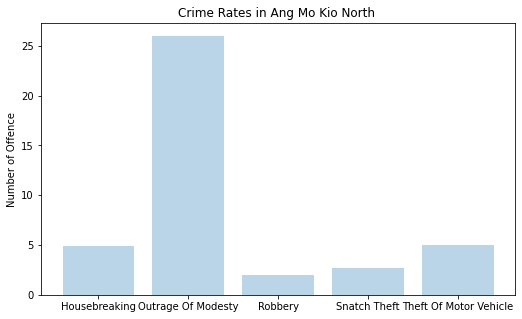

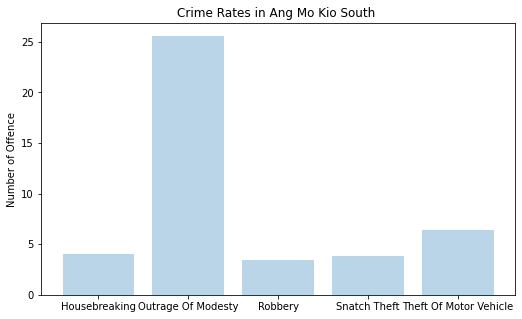

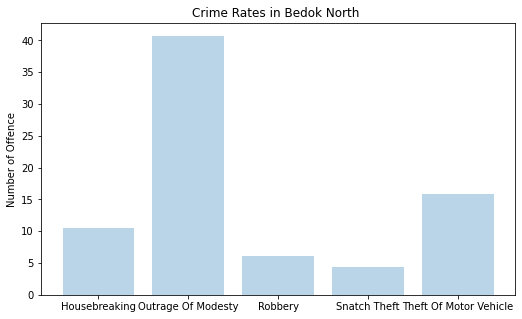

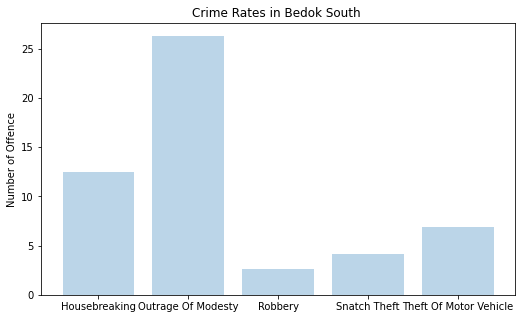

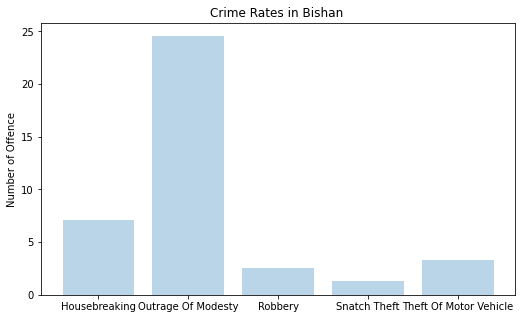

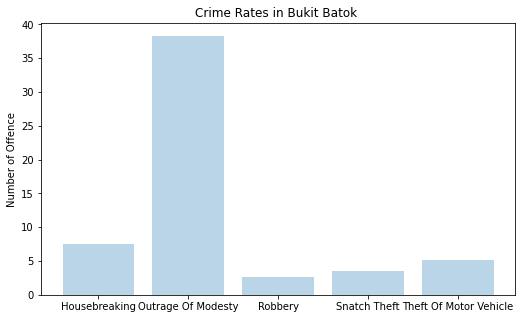

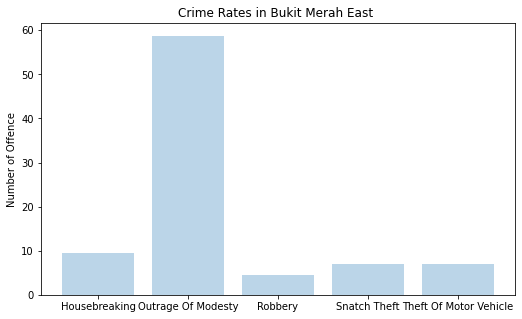

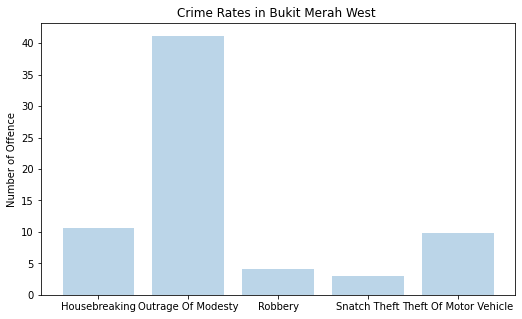

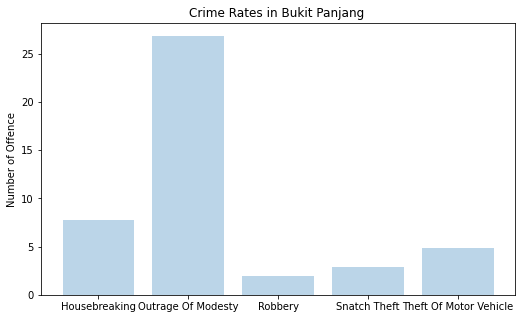

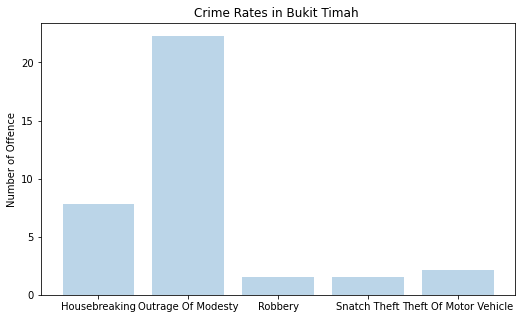

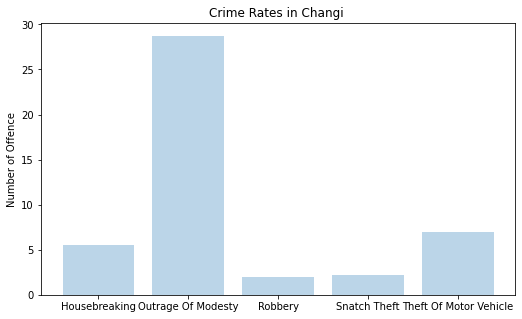

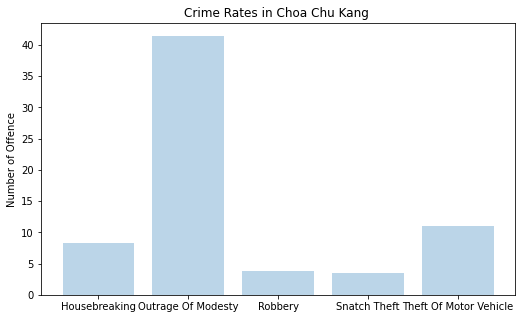

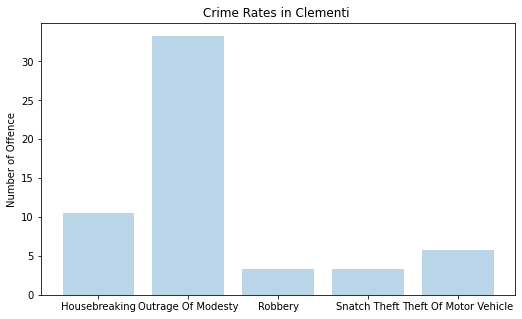

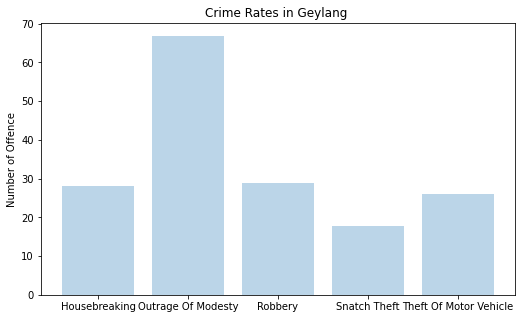

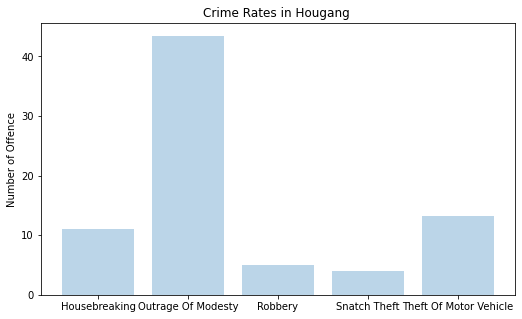

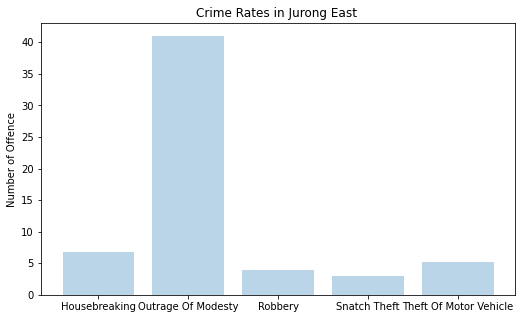

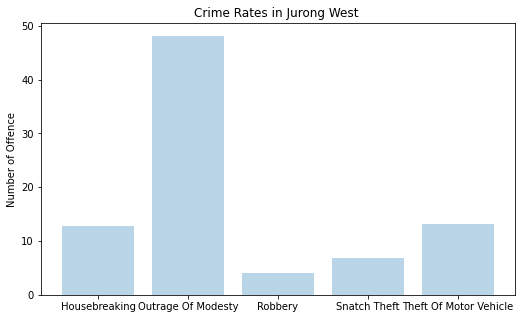

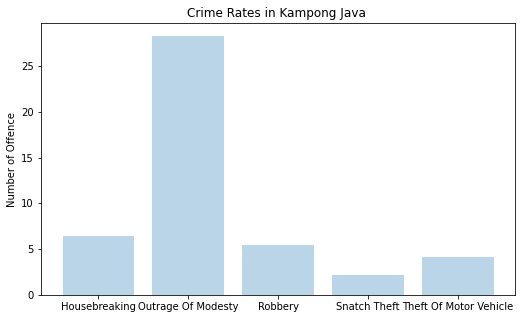

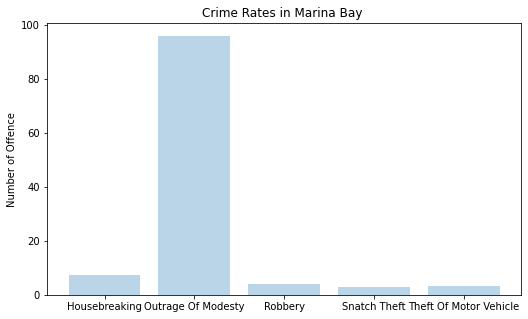

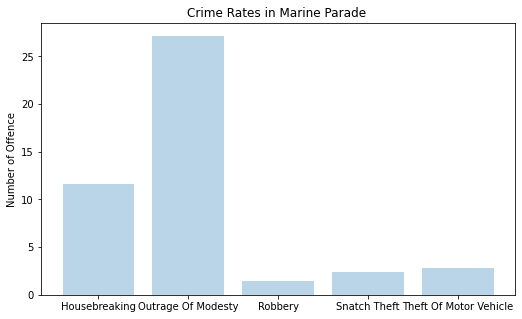

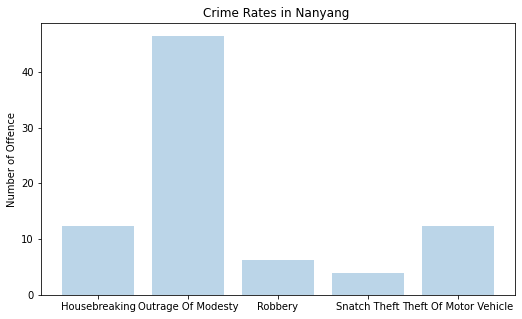

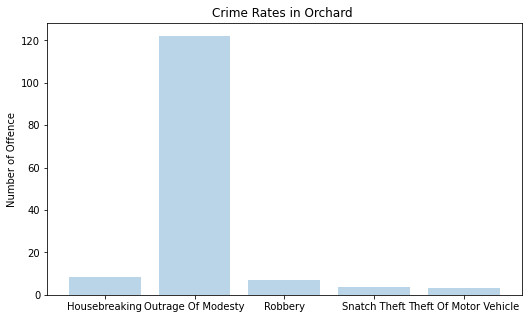

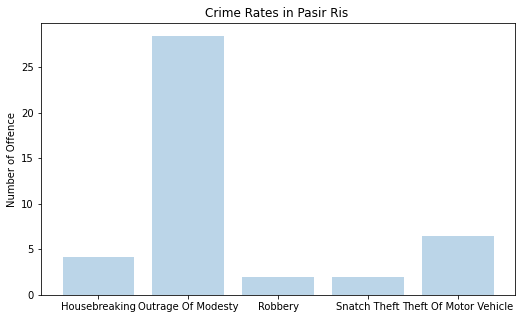

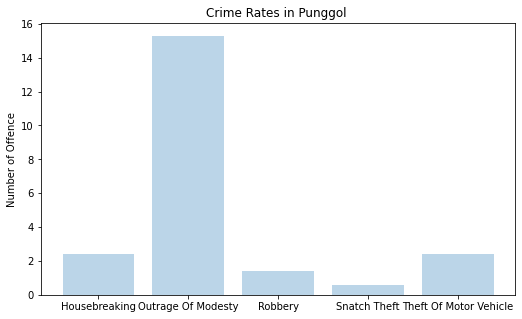

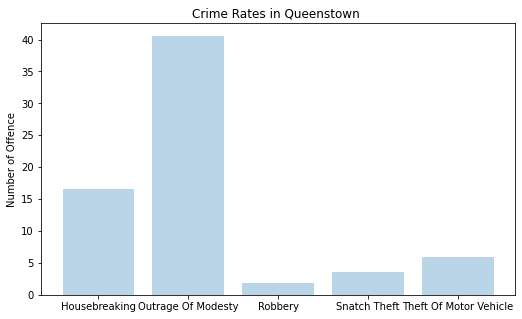

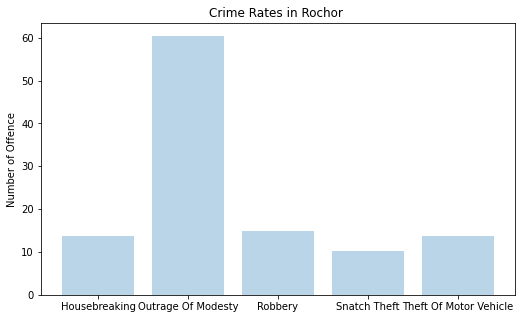

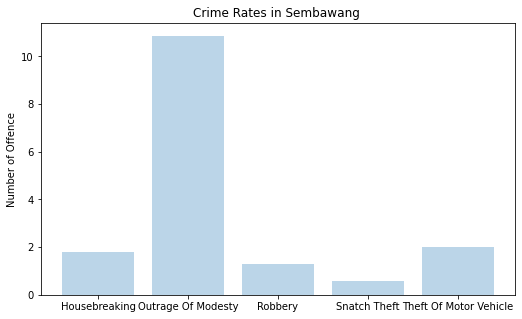

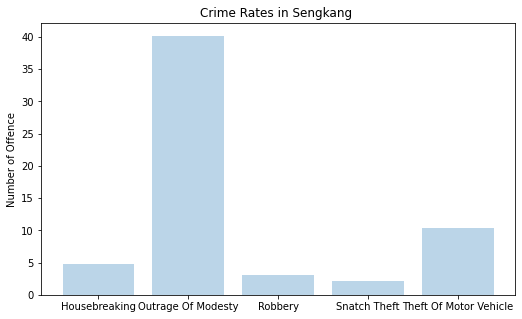

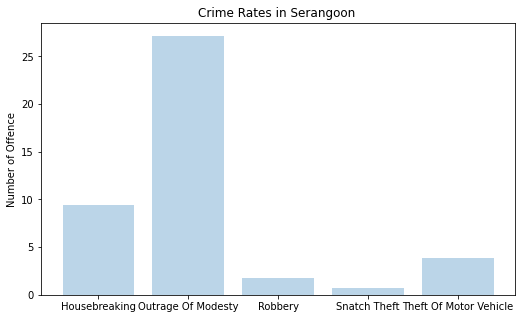

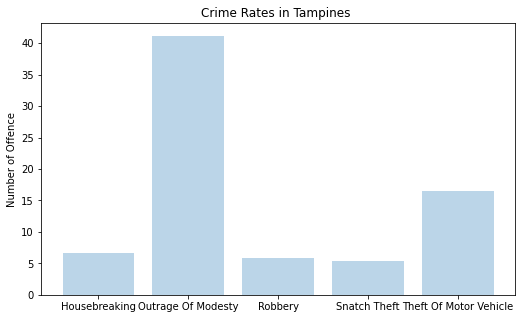

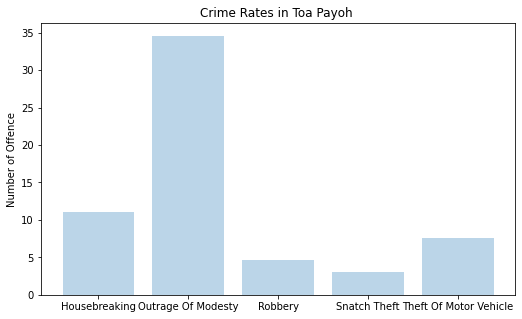

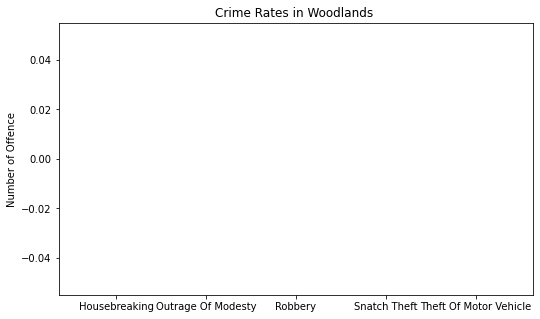

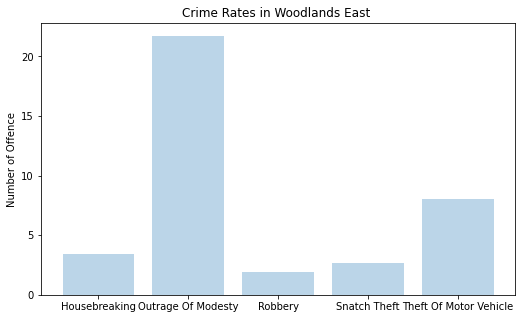

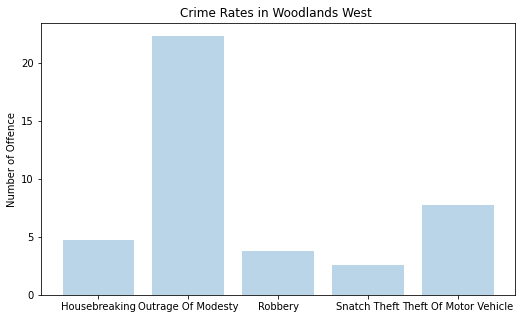

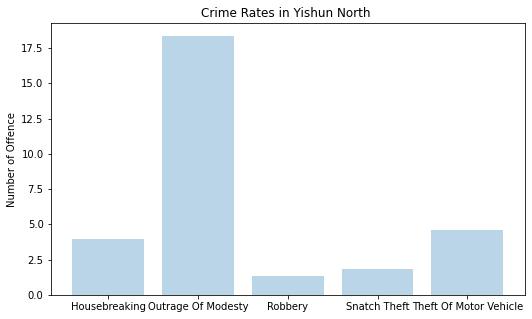

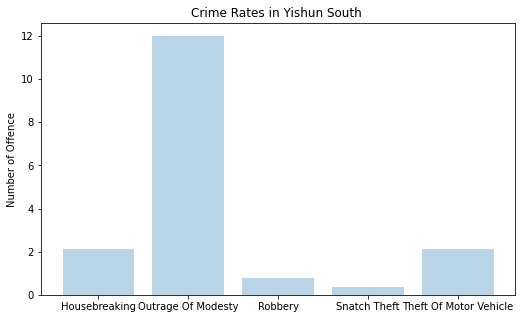

In [ ]:
#plt.figure(figsize=(8.5,8))
for nh in unique_nh:
  pos = 1
  nh_df = new_crime[(new_crime.Neighbourhood == nh)]
  #plt.subplot(2,2,pos)
  plt.figure(figsize=(8.5,5))
  plt.bar(nh_df['Offence'], nh_df['Number'], align='center', alpha=0.3)
  plt.ylabel('Number of Offence')
  plt.title('Crime Rates in' + nh)
  pos += 1
  plt.show()


In [ ]:
amk = new_crime[(new_crime.Neighbourhood == ' Ang Mo Kio North ')]
amk

,Neighbourhood,Postal,Offence,Number
0,Ang Mo Kio North,569784,Housebreaking,4.857143
1,Ang Mo Kio North,569784,Outrage Of Modesty,26.000000
2,Ang Mo Kio North,569784,Robbery,2.000000
3,Ang Mo Kio North,569784,Snatch Theft,2.714286
4,Ang Mo Kio North,569784,Theft Of Motor Vehicle,5.000000


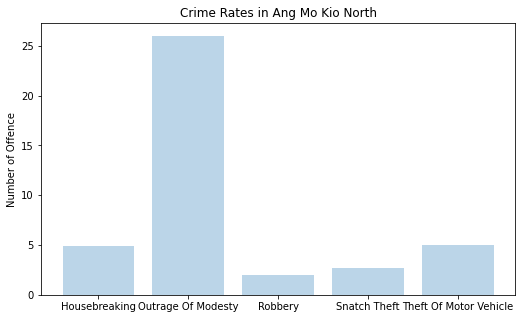

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8.5,5))
plt.bar(amk['Offence'], amk['Number'], align='center', alpha=0.3) # y_pos: on the x-axis
plt.ylabel('Number of Offence')
plt.title('Crime Rates in Ang Mo Kio North')
plt.show()

In [ ]:
new_crime.head()

,Neighbourhood,Postal,Offence,Number
0,Ang Mo Kio North,569784,Housebreaking,4.857143
1,Ang Mo Kio North,569784,Outrage Of Modesty,26.000000
2,Ang Mo Kio North,569784,Robbery,2.000000
3,Ang Mo Kio North,569784,Snatch Theft,2.714286
4,Ang Mo Kio North,569784,Theft Of Motor Vehicle,5.000000


In [ ]:
def extract(x):
  if 'Total' not in x:
    return 1
new_crime['ind'] = new_crime.Neighbourhood.apply(lambda x: extract(x))

In [ ]:
new = new_crime[(new_crime.ind == 1 )]


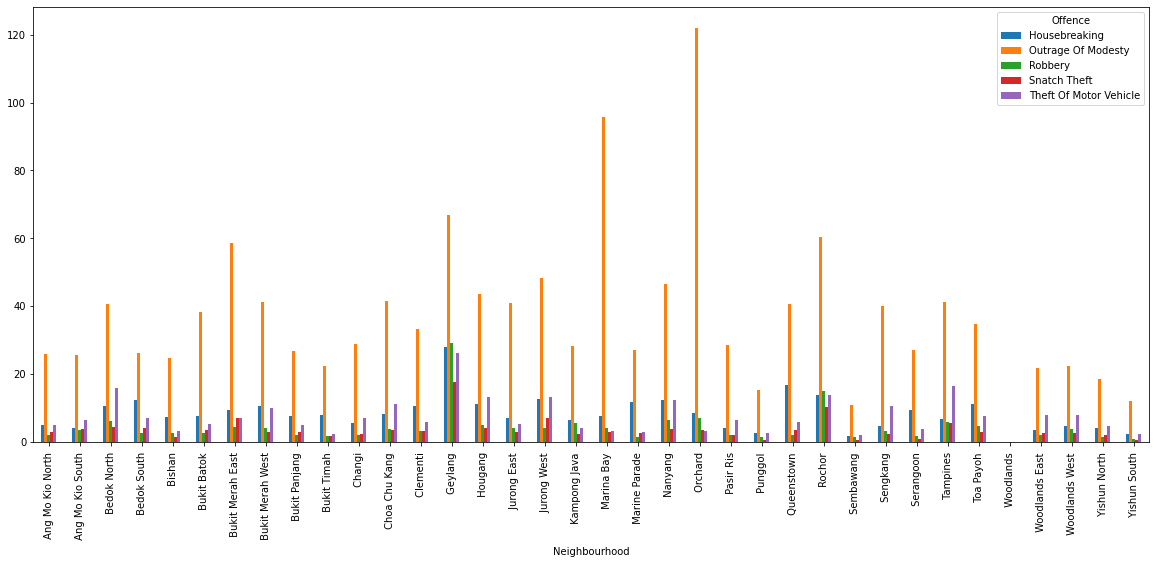

In [ ]:
new.pivot("Neighbourhood", "Offence", "Number").plot(kind='bar', figsize=(20, 8))
plt.show()

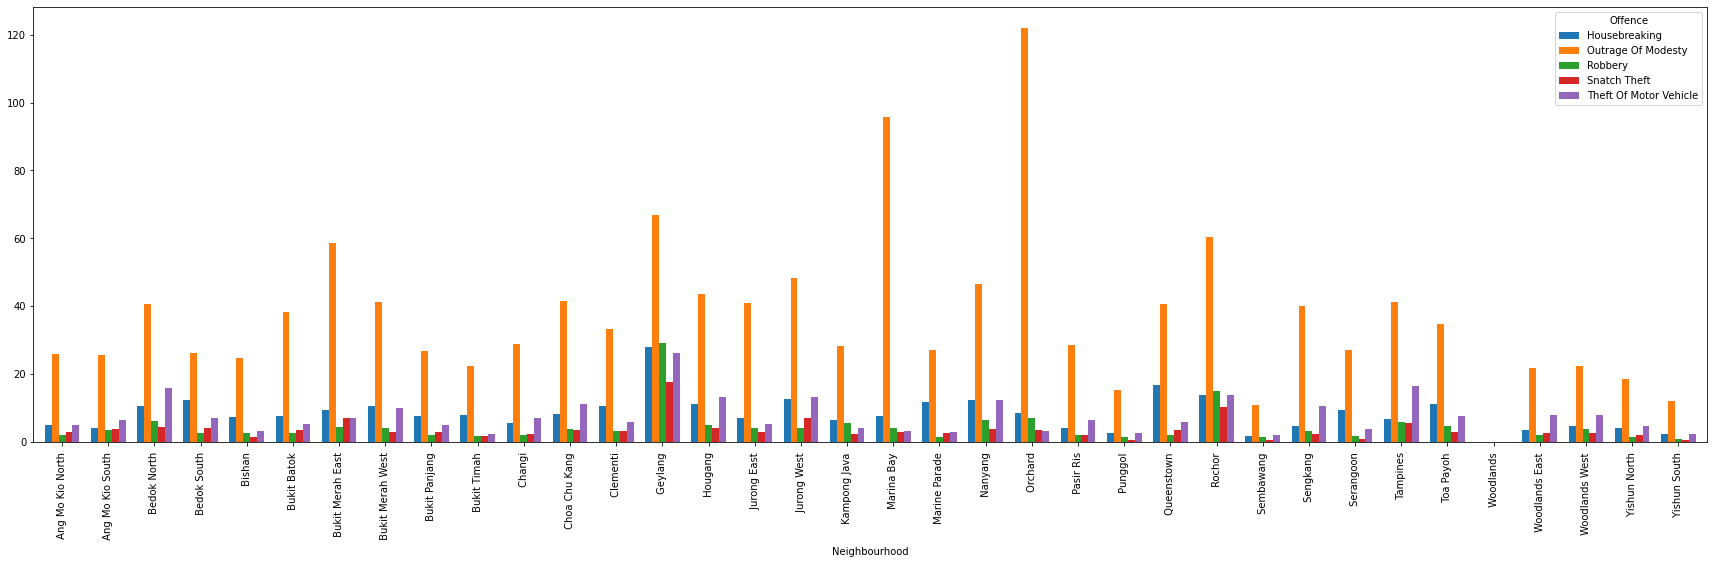

In [ ]:
new.pivot("Neighbourhood", "Offence", "Number").plot(kind='bar', figsize=(30, 8), width = 0.75)
plt.show()

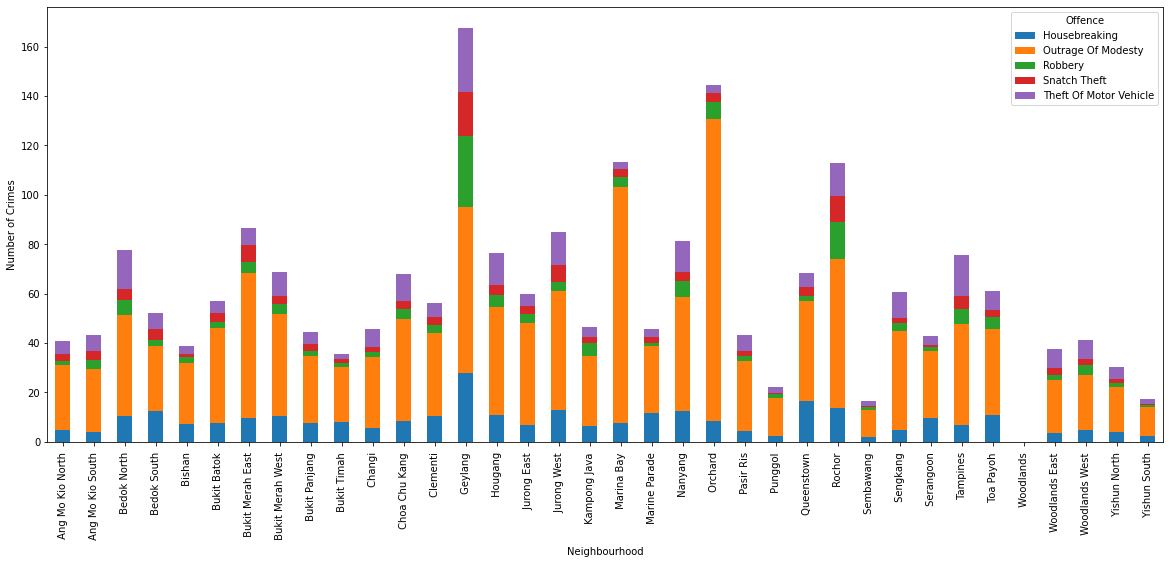

In [ ]:
new.pivot("Neighbourhood", "Offence", "Number").plot(kind='bar', figsize=(20, 8), stacked = True)
plt.ylabel('Number of Crimes')
plt.show()
# possible limitation (Can add in report): no data for Woodlands (neighbourhood)

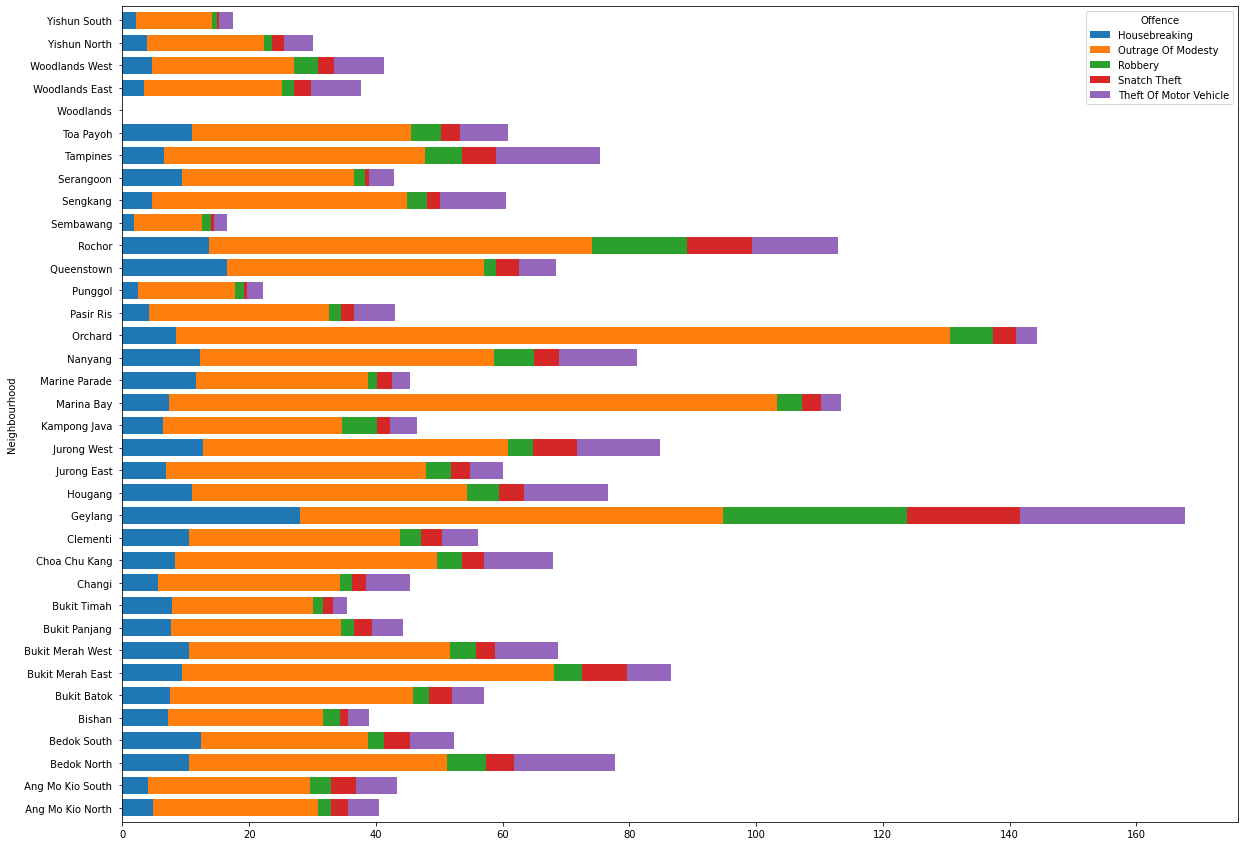

In [ ]:
new.pivot("Neighbourhood", "Offence", "Number").plot(kind='barh', figsize=(20, 15), stacked = True, width = 0.75)
plt.show()

# possible limitations (Can add in report): 
# no results for Woodlands (neighbourhood)
# results are for NPC, not NPPs 
# These are limitations of the dataset, and crime rates is hard to collect


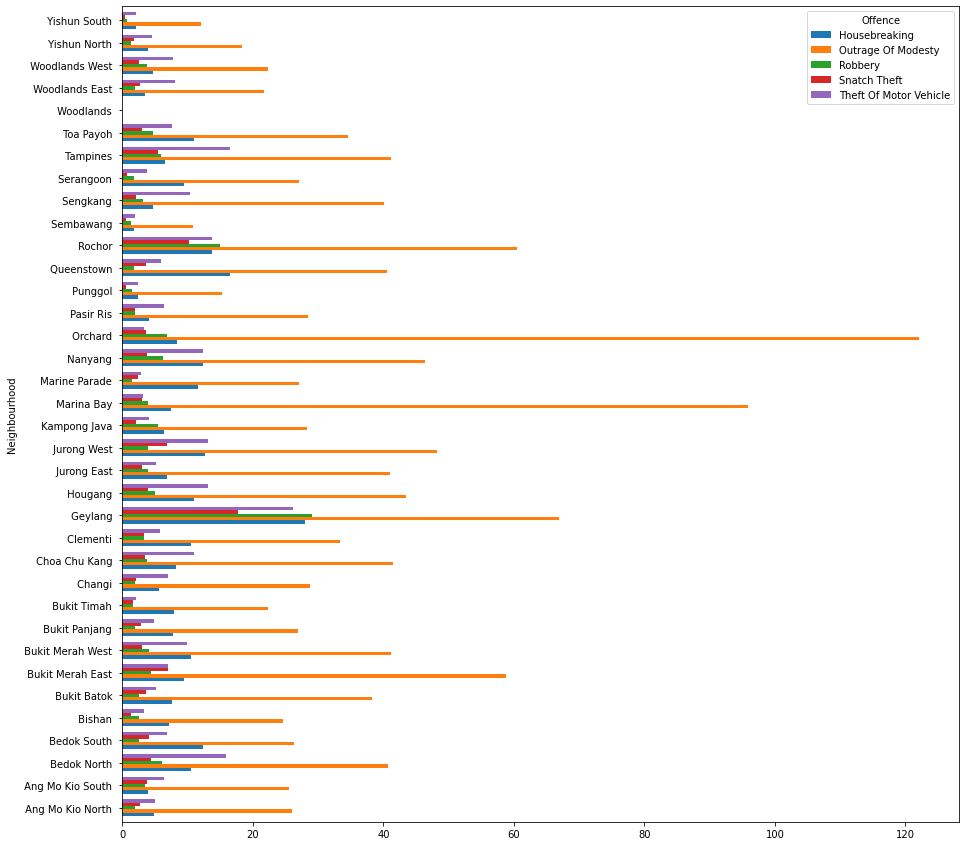

In [ ]:
new.pivot("Neighbourhood", "Offence", "Number").plot(kind='barh', figsize=(15, 15), width = 0.75)
plt.show()